# Problem of Customer Segmentation for a shopping mall

The goal is to group customers into different clusters based on their behavior (like Annual Income and Spending Score) — without knowing labels in advance.
This helps the mall create targeted marketing strategies for different groups (high-spenders, budget customers, etc.).

Dataset used: Mall Customer Segmentation Data (Mall_Customers.csv)

Features:

- CustomerID (ignored)

- Gender

- Age

- Annual Income (k$)

- Spending Score (1–100)

In [27]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os
import warnings

os.environ["OMP_NUM_THREADS"] = "1"

# Suppress specific warnings related to KMeans memory leak
warnings.filterwarnings("ignore", category=UserWarning, message="KMeans is known to have a memory leak")


In [28]:
# Load the real-world data
df = pd.read_csv(r'D:\ML\Projects\K-Means-Clustering\Mall_Customers.csv')

In [29]:
# Display the first few rows of the dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [30]:
# For clustering, we will use 'Annual Income' and 'Spending Score'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

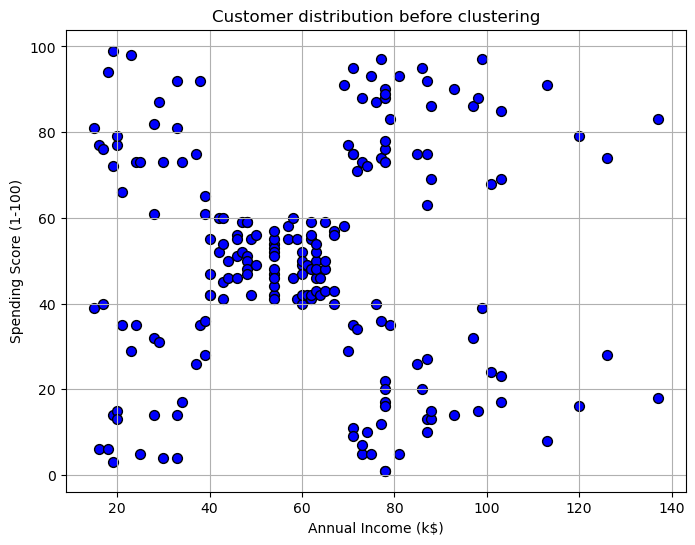

In [31]:
# Visualizing the input data
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c='blue', edgecolor='k', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer distribution before clustering')
plt.grid(True)
plt.show()

In [32]:
# Random Initialization and Elbow Method to find the best k
wcss = []  # Within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ gives WCSS

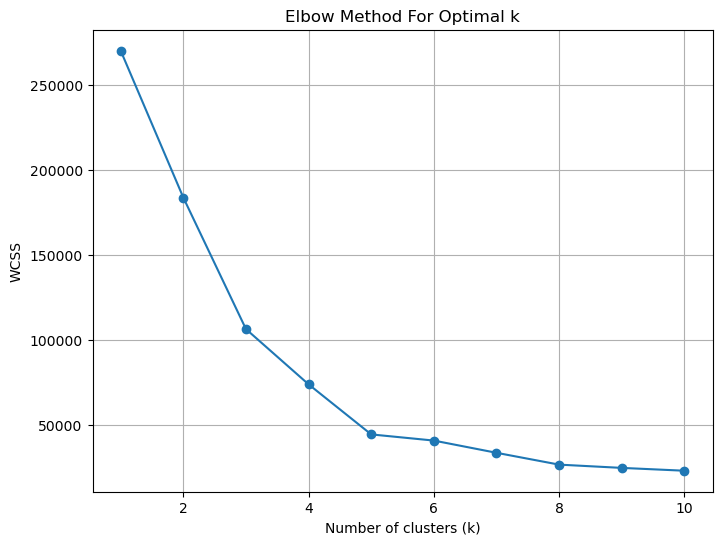

In [33]:
# Plot the Elbow graph
plt.figure(figsize=(8,6))
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [34]:
# From the elbow, let's choose k=5
k = 5
kmeans = KMeans(n_clusters=k, init='random', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [35]:
# Centroids after clustering
print("\nCentroids found by K-Means:\n", kmeans.cluster_centers_)


Centroids found by K-Means:
 [[26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]]


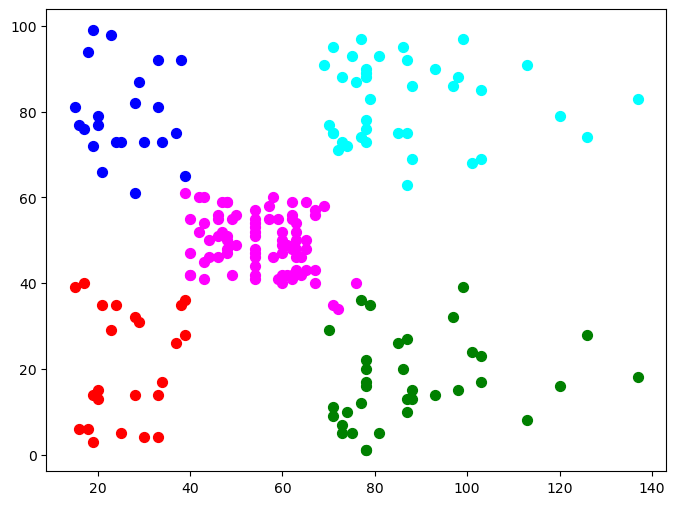

In [36]:
# Visualizing the clusters (2D)
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(k):
    plt.scatter(X[y_kmeans==i, 0], X[y_kmeans==i, 1], 
                s=50, c=colors[i], label=f'Cluster {i+1}')

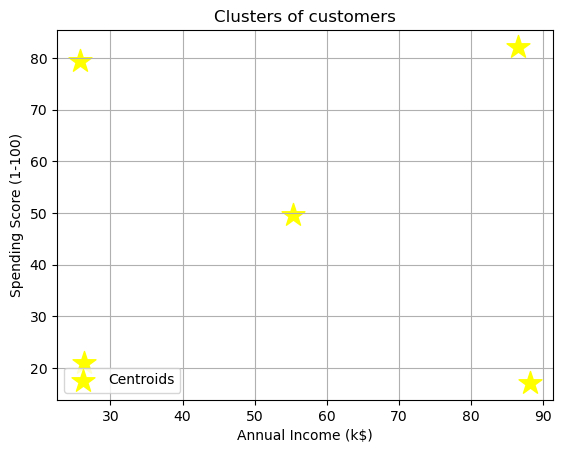

In [37]:
# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='*', label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters of customers')
plt.legend()
plt.grid(True)
plt.show()

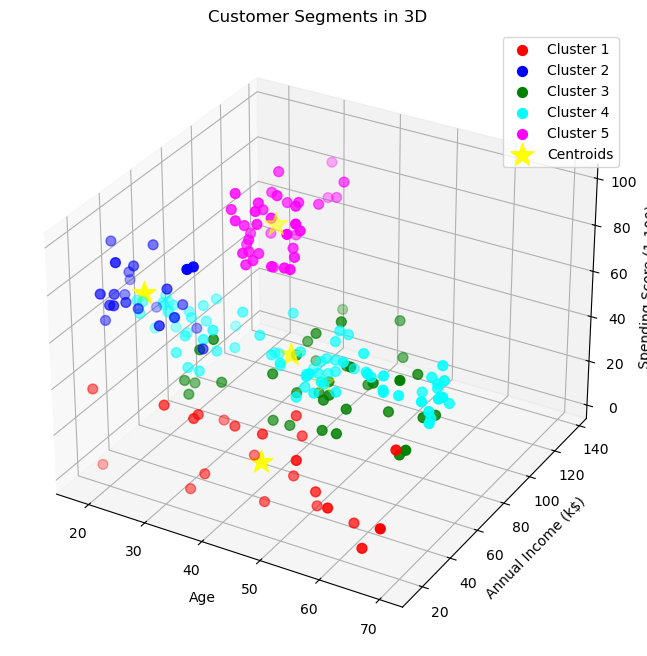

In [38]:
# 3D Visualization (Age, Income, Spending Score)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X3D = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
kmeans_3d = KMeans(n_clusters=5, init='random', random_state=42)
y_kmeans_3d = kmeans_3d.fit_predict(X3D)

for i in range(k):
    ax.scatter(X3D[y_kmeans_3d==i, 0], 
               X3D[y_kmeans_3d==i, 1], 
               X3D[y_kmeans_3d==i, 2], 
               s=50, c=colors[i], label=f'Cluster {i+1}')

ax.scatter(kmeans_3d.cluster_centers_[:, 0], 
           kmeans_3d.cluster_centers_[:, 1], 
           kmeans_3d.cluster_centers_[:, 2], 
           s=300, c='yellow', marker='*', label='Centroids')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Customer Segments in 3D')
ax.legend()
plt.show()